In [1]:
from astropy.table import QTable
import matplotlib.pyplot as plt

# Figure 10 - Energy resolution and bias

In [2]:
table_a2 = QTable.read('data/magic_2015_table_a2.ecsv')
table_a3 = QTable.read('data/magic_2015_table_a3.ecsv')

In [3]:
table_a2['E_center'] = np.sqrt(table_a2['E_min'] * table_a2['E_max'])
table_a3['E_center'] = np.sqrt(table_a3['E_min'] * table_a3['E_max'])

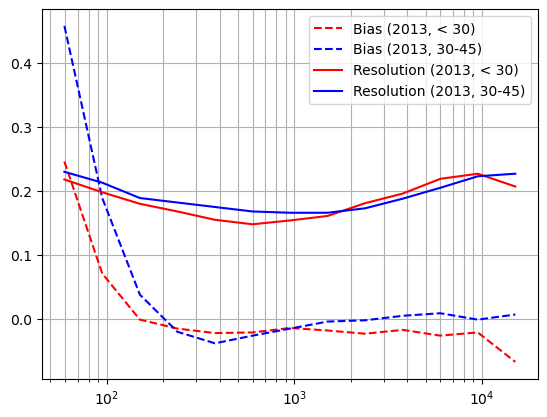

In [4]:
plt.plot(table_a2['E_center'], table_a2['bias'], label='Bias (2013, < 30)', ls='--', color='red')
plt.plot(table_a3['E_center'], table_a3['bias'], label='Bias (2013, 30-45)', ls='--', color='blue')
plt.plot(table_a2['E_center'], table_a2['σ'], label='Resolution (2013, < 30)', color='red')
plt.plot(table_a3['E_center'], table_a3['σ'], label='Resolution (2013, 30-45)', color='blue')


plt.xscale('log')
plt.grid(True, which='both')
plt.legend()

# Figure 14 - Angular resolution

In [5]:
table_a4_zen3045 = QTable.read('data/magic_2015_table_a4_30zen45.ecsv')
table_a3_lowzen = QTable.read('data/magic_2015_table_a4_zen30.ecsv')

tables = [table_a3_lowzen, table_a4_zen3045]

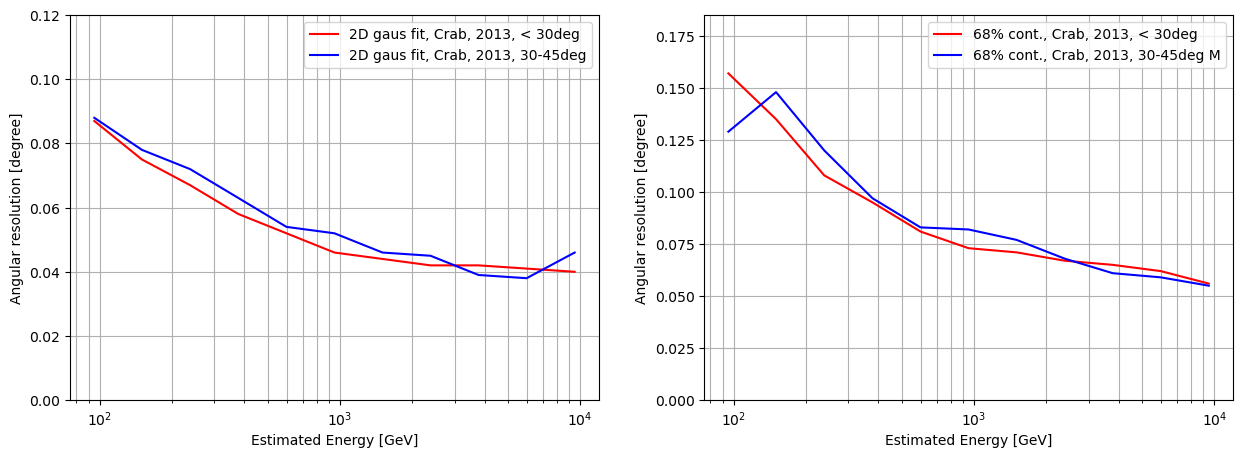

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

ax = axes[0]
ax.plot(table_a3_lowzen['E'], table_a3_lowzen['theta_g'], color='red', label='2D gaus fit, Crab, 2013, < 30deg')
ax.plot(table_a4_zen3045['E'], table_a4_zen3045['theta_g'], color='blue', label='2D gaus fit, Crab, 2013, 30-45deg')
ax.set_ylim(0, 0.12)

ax = axes[1]
ax.plot(table_a3_lowzen['E'], table_a3_lowzen['theta_68'], color='red', label='68% cont., Crab, 2013, < 30deg')
ax.plot(table_a4_zen3045['E'], table_a4_zen3045['theta_68'], color='blue', label='68% cont., Crab, 2013, 30-45deg M')
ax.set_ylim(0, 0.185)

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlabel('Estimated Energy [GeV]')
    ax.set_ylabel('Angular resolution [degree]')
    ax.legend()
    ax.grid(True, which='both')

**Note: The careful reader will notice that the angular resolution for the 68% containement radius does not correspond to the figure shown in the paper.**

# Figure 17

In [7]:
table_a5 = QTable.read('data/magic_2015_table_a5.ecsv')
table_a6 = QTable.read('data/magic_2015_table_a6.ecsv')

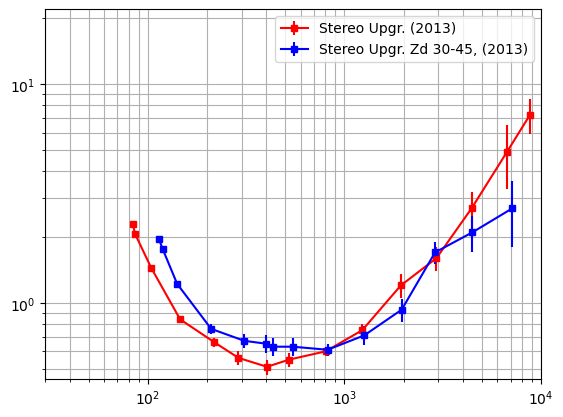

In [8]:
plt.errorbar(table_a5['e_thresh'],
             table_a5['sensitivity_snr_cu'],
             yerr=table_a5['sensitivity_snr_cu_err'],
             markersize=5,
             marker='s',
             color='red',
             label='Stereo Upgr. (2013)'
            )


plt.errorbar(table_a6['e_thresh'],
             table_a6['sensitivity_snr_cu'],
             yerr=table_a6['sensitivity_snr_cu_err'],
             markersize=5,
             marker='s',
             color='blue',
             label='Stereo Upgr. Zd 30-45, (2013)'
            )

plt.xscale('log')
plt.yscale('log')

plt.xlim(30, 1e4)
plt.ylim(0.45, 22)

plt.grid(True, which='both')
plt.legend()

**Note: data is missing for the last bin**

# Figure 18

In [9]:
table_a7 = QTable.read('data/magic_2015_table_a7.ecsv')
table_a8 = QTable.read('data/magic_2015_table_a8.ecsv')

In [10]:
for table in [table_a7, table_a8]:
    table['e_center'] = np.sqrt(table['e_min'] * table['e_max'] )

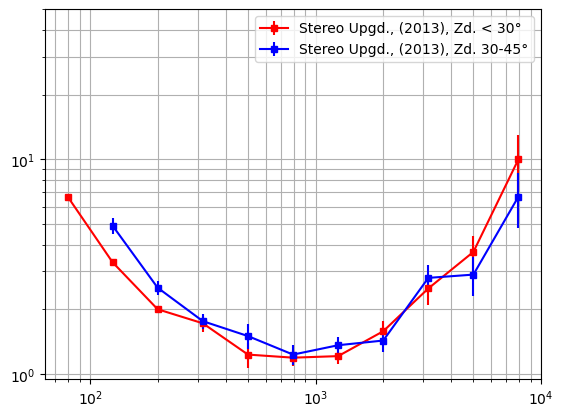

In [11]:
plt.errorbar(table_a7['e_center'],
             table_a7['sensitivity_snr_cu'],
             yerr=table_a7['sensitivity_snr_cu_err'],
             markersize=5,
             marker='s',
             color='red',
             label='Stereo Upgd., (2013), Zd. < 30°'
            )


plt.errorbar(table_a8['e_center'],
             table_a8['sensitivity_snr_cu'],
             yerr=table_a8['sensitivity_snr_cu_err'],
             markersize=5,
             marker='s',
             color='blue',
             label='Stereo Upgd., (2013), Zd. 30-45°'
            )

plt.xscale('log')
plt.yscale('log')

# plt.xlim(30, 1e4)
plt.ylim(0.95, 50)

plt.grid(True, which='both')
plt.legend()